In [144]:
import pandas as pd
import numpy as np
%load_ext autoreload
%autoreload 2
import utility_01
from utility_01 import *
from sklearn.metrics import roc_curve ,roc_auc_score ,precision_recall_curve,auc
from warnings import filterwarnings
filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
options = {"compact": True, "bg": "#09a3d5",
           "color": "white", "font": "Source Sans Pro","collapse_phrases":False}

In [146]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('max_colwidth', 260)


# Read the Data

In [147]:
df=pd.read_json('../data/dfObsV02A02.json');
df=df.sort_index();


In [148]:
df.head()

,sents,chapter,aso,entities,fner,label
0,Chapter 1,1,{'act': 'Chapter'},[],"[0, 0, 0]",0
1,"On the distinction between the first motion and the second or proper motions; and in the proper motions, between the first and the second inequality.",1,{'act': 'On'},[],"[0, 0, 0]",0
2,The testimony of the ages confirms that the motions of the planets are orbicular.,1,"{'act': 'confirms', 'subject': 'testimony'}",[],"[0, 0, 0]",0
3,"Reason, having borrowed from experience, immediately presumes this: that their gyrations are perfect circles.",1,"{'act': 'presumes', 'subject': 'reason', 'obj': 'this: that their gyrations are perfect circles'}",[],"[0, 0, 0]",0
4,"For among figures it is circles, and among bodies the heavens, that are considered the most perfect.",1,{'act': 'considered'},[],"[0, 0, 0]",0


In [149]:
df.tail()

,sents,chapter,aso,entities,fner,label
6694,"To find the position of Mars at opposition, Kepler computed the angular distance that Mars and Earth—now substituting the place of the Sun—moved during 17 hours 20 minutes; Mars moved eastward about 16' 20"" and the Sun westward about 42' 18"".",appendix b,"{'act': 'moved', 'subject': 'mars'}","[[Mars, PLAN], [opposition, ASTR], [Mars, PLAN], [Earth, PLAN], [Sun, PLAN], [17 hours 20 minutes, TIME], [Mars, PLAN], [eastward, ASTR], [16' 20"", LONG], [Sun, PLAN], [42' 18"", LONG]]","[0, 1, 1]",0
6695,"Accordingly, Kepler determined the longitude of Mars at opposition to be 198° 37' 50"" from which he subtracted about 39"" in order to correct Mars's orbit; he got 198° 37' 10"" (18° 37' 10"" Libra).",appendix b,"{'act': 'got', 'subject': 'he', 'obj': '' 10'}","[[longitude, ASTR], [Mars, PLAN], [opposition, ASTR], [198° 37' 50"", LONG], [Mars, PLAN], [orbit, ASTR], [198° 37' 10"", LONG], [18° 37' 10"" Libra, LONG]]","[0, 0, 1]",0
6696,The Sun moved westward and its longitude decreased from the time of observation to its position opposite to Mars.,appendix b,"{'act': 'moved', 'subject': 'sun'}","[[Sun, PLAN], [longitude, ASTR], [observation, ASTR], [Mars, PLAN]]","[0, 0, 0]",0
6697,"Therefore, the time of opposition is 17 hours 20 minutes before March 29, at 21:43, the time when the observation was made.",appendix b,"{'act': 'is', 'subject': 'time'}","[[opposition, ASTR], [17 hours 20 minutes, TIME], [March 29, DATE], [observation, ASTR]]","[1, 1, 0]",0
6698,"Kepler determined the time of opposition on March 28, 4h 23m AM, old style.",appendix b,"{'act': 'determined', 'subject': 'kepler', 'obj': 'the time of opposition on March 28'}","[[opposition, ASTR], [March 28, DATE], [4h 23m, TIME]]","[1, 1, 0]",0


# Distribution of Samples 

In [150]:
X=list(df["sents"])
y=np.array(list(df["label"]))

In [151]:
from collections import Counter
category=Counter(y)
count=dict(category)

In [152]:
count

{0: 6624, 1: 75}

Text(0.5, 1.0, 'Distribution of samples over different classes')

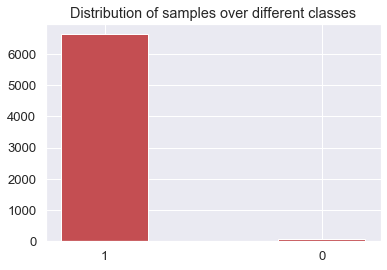

In [153]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")


In [154]:
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import SGDClassifier, LogisticRegression,LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import SVC,LinearSVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
#from xgboost import XGBClassifier

## Models

In [155]:
vec=TfidfVectorizer()
clf= SGDClassifier()
trial_05=Pipeline([("vect",vec),("clf",clf)])
#####################################################
## 02-XGBClassifier
#trial_02 = Pipeline([('vect', CountVectorizer(stop_words='english')),
                     #('clf', XGBClassifier())])


In [156]:
trial_05

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [157]:
type(df["entities"][0])

list

In [158]:
X_Obs=df.loc[df.label==1]
X_Obs=X_Obs.sents
X_Obs=list(X_Obs)


In [159]:
dfX_Obs=pd.DataFrame(X_Obs)

In [160]:
dfX_Obs.head(30)

,0
0,"On 1580 November 12 at 10h 50m,1 they set Mars down at 8° 36’ 50” Gemini2 without mentioning the horizontal variations, by which term I wish the diurnal parallaxes and the refractions to be understood in what follows."
1,"On 1582 December 28 at 11h 30m, they set Mars down at 16° 47’ Cancer by observation ^6."
2,"On 1585 January 31 at 12h 0m, Mars was placed at 21° 18’ 11” Leo ^8."
3,"On 1587 March 7 at 19h 10m they deduced the position of Mars from the observations, which was 25° 10’ 20” Virgo."
4,"On 1589 April 15 at 12h 5m they established the position of Mars very carefully at 3° 58' 21"" Scorpio, and corrected for longitudinal parallax so as to make it 3° 57’ 11” ^10."
5,"On 1591 June 6 at 12h 20m, Mars is placed at 27° 15’ Sagittarius ^11."
6,"On 1595 October 30 at 8h 20m, they found Mars at 17° 48’ Taurus, with a diurnal motion of 22’ 54” ^15."
7,"On 1597 December 10 at 8h 30m, they first placed Mars at 3° 30’ Cancer, and again at 4° 1’ Cancer, the mean being 3° 45½’ Cancer ^16."
8,"This gives a diurnal motion of 23’ 44”, and a position on January 19/29 at 9h 40m of 8° 18’ 45” Leo, just as they put it."
9,"Again, at 7h 15m on the morning of December 27, it was 36° 43’ from Cor Leonis,7 whose latitude is 0° 26½’; hence, its longitude at the end of 1582 is 17° 28⅓’ Cancer, altitude 14° 4’, and thus affected by refraction."


In [161]:
Y_Obs=df.loc[df.label==1]
Y_Obs=Y_Obs.label
Y_Obs=list(Y_Obs)

In [162]:
X_NObs=df.loc[df.label==0]
X_NObs=X_NObs.sents
X_NObs=list(X_NObs)

In [163]:
Y_NObs=df.loc[df.label==0]
Y_NObs=Y_NObs.label
Y_NObs=list(Y_NObs)

In [164]:
import random
number_of_samples = len(X_Obs)
X_NObs=random.sample(X_NObs,number_of_samples);
len(X_NObs)

75

In [165]:
dfX_NObs=pd.DataFrame(X_NObs)

In [166]:
dfX_NObs.head(30)

,0
0,"Second, the Ptolemaic equation and apogee being retained, let 30 minutes be added to the fixed stars."
1,"Whichever of the described ways is used for delineating the line possessing the body of the planet, it now follows that this way indicated by the points δ, μ, ν, ο, π, ρ, λ, is truly oval, not the elliptical one to which the mechanics give that name from ..."
2,"For they will attribute to the plane of Mars's eccentric FE an inclination to the plane of the ecliptic DC that does not librate, but is fixed and constant, above the diameter BA of intersection of these planes, drawn through the center of the world (the c..."
3,"Measure the time, or the artificial units expressing time, which is the astronomers' mean anomaly, on the epicycle CE, from its aphelion C, in a direction opposite the series of signs ^5."
4,"That the equations of Ptolemy's day were really equal to ours, the constancy of the modern ones argues."
5,"Only the position of this path, in the first model, would be altered through the space of the sun's eccentricity, while in the second, although the path would stay fixed, the point whence the eccentricity is reckoned would also be shifted by the same amount."
6,I therefore proclaim that the acronychal positions displayed by this calculation are as certain as the observations made with the Tychonic sextants can be.
7,"Therefore, the nonagesimal was 64° from the zenith, giving a diurnal latitudinal parallax of 5’ 24“."
8,"Now if you were to make individual parallelograms in this manner in the individual sectors, then the whole parallelogram divided into parts will be equivalent to the whole area of the semicircle; that is, the ratio 2:1 holds everywhere."
9,"For, as was noted just above in considering the second method, this preoccupation with epicyclic motion is excessive, showing distances at the middle elongations that are too small, from which it happens that at that place the planet exceeds its measure of..."


In [167]:
number_of_samples = len(Y_Obs)
Y_NObs=random.sample(Y_NObs,number_of_samples);
len(Y_NObs)

75

In [168]:
y=Y_NObs+Y_Obs


In [169]:
X=X_NObs+X_Obs

In [170]:
category=Counter(y)
count=dict(category)

Text(0.5, 1.0, 'Distribution of samples over different classes')

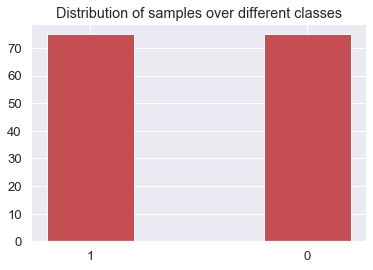

In [171]:
plt.bar(list(count.keys()),count.values(),color="r",width=.4,tick_label=["1","0"])
plt.title("Distribution of samples over different classes")

In [172]:
X,y = shuffle(X, y, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
X,y, test_size=0.10, random_state=42)  

## 1-SGD

In [173]:
trial_05.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [174]:
y_pred=trial_05.predict(X_test)

[[8 1]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.86      1.00      0.92         6

   micro avg       0.93      0.93      0.93        15
   macro avg       0.93      0.94      0.93        15
weighted avg       0.94      0.93      0.93        15



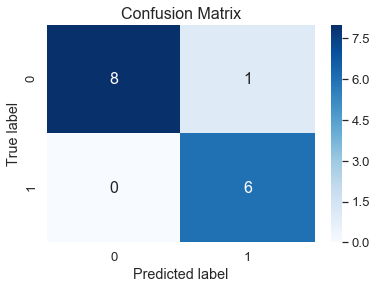

In [175]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cr=classification_report(y_test,y_pred)
print(cr)
Colorful_Confusion_Matrix(y, y_test, y_pred)


In [176]:
cross_validation_accuracy(trial_05,X,y,cv=10)

[0.875      0.875      0.9375     0.875      0.9375     1.
 1.         1.         0.85714286 1.        ]
Accuracy of : 0.936 ± 0.116


In [177]:
y_pred = cross_val_predict(trial_05, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)
print(cm)

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        75
           1       0.87      0.96      0.91        75

   micro avg       0.91      0.91      0.91       150
   macro avg       0.91      0.91      0.91       150
weighted avg       0.91      0.91      0.91       150

[[64  3]
 [11 72]]


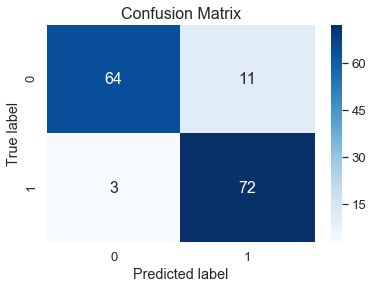

In [178]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [179]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


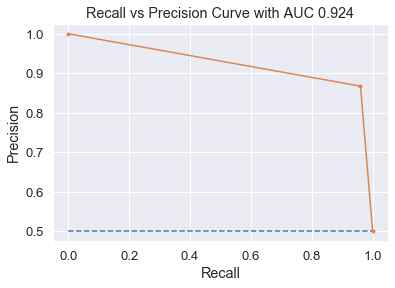

AUC: 0.924


In [180]:
plot_pr(recall, precision)

# 2- Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
trial_06=Pipeline([("vect",vec),("clf",RF)])
trial_06.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...obs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [182]:
cross_validation_accuracy(trial_06,X,y,cv=10)

[1.         0.875      0.9375     0.9375     1.         0.92857143
 0.92857143 0.85714286 0.71428571 0.85714286]
Accuracy of : 0.904 ± 0.159


In [183]:
y_pred = cross_val_predict(trial_06, X, y, cv=10)

cr=classification_report(y,y_pred)
print(cr)
cm = confusion_matrix(y_pred,y)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        75
           1       0.92      0.88      0.90        75

   micro avg       0.90      0.90      0.90       150
   macro avg       0.90      0.90      0.90       150
weighted avg       0.90      0.90      0.90       150



In [184]:
print(cm)

[[69  9]
 [ 6 66]]


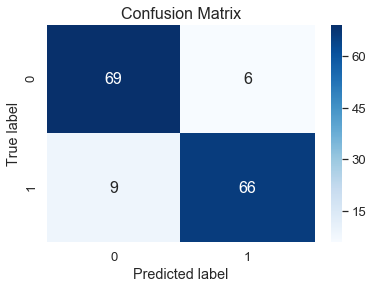

In [185]:
Colorful_Confusion_Matrix(y=y,y_test=y,y_pred=y_pred)

In [186]:
precision, recall, thresholds = precision_recall_curve(y,y_pred)  
auc_score = auc(recall, precision)


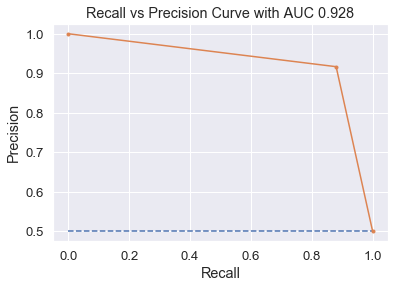

AUC: 0.928


In [187]:
plot_pr(recall, precision)

In [188]:
import pickle
saved_model = pickle.dumps(trial_06)

In [189]:
Pkl_Filename = "Pickle_RF_RESAMPLED_Model_02.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(trial_06, file)